# Importations

In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3
import numpy as np

from pylab import *
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams['font.size'] = 20
mpl.rc('image', cmap='plasma') 
import gc
import time, sys
from statistics import mean
import os
from PIL import Image
import math
from skimage import io
import ipywidgets as widgets

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Extraction of Data

In [3]:
path = 'C:/Users/Brian/Simulations/Brian_playground/'

data_path_D10V48 = path + 'upstream_crop_D10V48/'
data_path_D10V60 = path + 'upstream_crop_D10V60/'
data_path_D10V90 = path + 'upstream_crop_D10V90/'
data_path_D10V100 = path + 'upstream_crop_D10V100/'
data_path_D10V120 = path + 'upstream_crop_D10V120/'

folder = path + 'comparison_correlations_D10/'

#Create the folder where your data will be saved
if not os.path.exists(folder):
    os.mkdir(folder)

In [10]:
#to define the value of some important parameters

framerate = 20
pixcam = 5.5
obj = 4

#We define the Stokes Time relative to each video
 

# Temporal correlations

In [5]:
temporal_D10V48 = genfromtxt(data_path_D10V48 + 'temporal_correlation.txt')[0]
delay_D10V48 = genfromtxt(data_path_D10V48 + 'temporal_correlation.txt')[1]
fit_D10V48 = genfromtxt(data_path_D10V48 + 'Fit_temporal_correlation.txt')

temporal_D10V60 = genfromtxt(data_path_D10V60 + 'temporal_correlation.txt')[0]
delay_D10V60 = genfromtxt(data_path_D10V60 + 'temporal_correlation.txt')[1]
fit_D10V60 = genfromtxt(data_path_D10V60 + 'Fit_temporal_correlation.txt')

temporal_D10V90 = genfromtxt(data_path_D10V90 + 'temporal_correlation.txt')[0]
delay_D10V90 = genfromtxt(data_path_D10V90 + 'temporal_correlation.txt')[1]
fit_D10V90 = genfromtxt(data_path_D10V90 + 'Fit_temporal_correlation.txt')

temporal_D10V100 = genfromtxt(data_path_D10V100 + 'temporal_correlation.txt')[0]
delay_D10V100 = genfromtxt(data_path_D10V100 + 'temporal_correlation.txt')[1]
fit_D10V100 = genfromtxt(data_path_D10V100 + 'Fit_temporal_correlation.txt')

temporal_D10V120 = genfromtxt(data_path_D10V120 + 'temporal_correlation.txt')[0]
delay_D10V120 = genfromtxt(data_path_D10V120 + 'temporal_correlation.txt')[1]
fit_D10V120 = genfromtxt(data_path_D10V120 + 'Fit_temporal_correlation.txt')

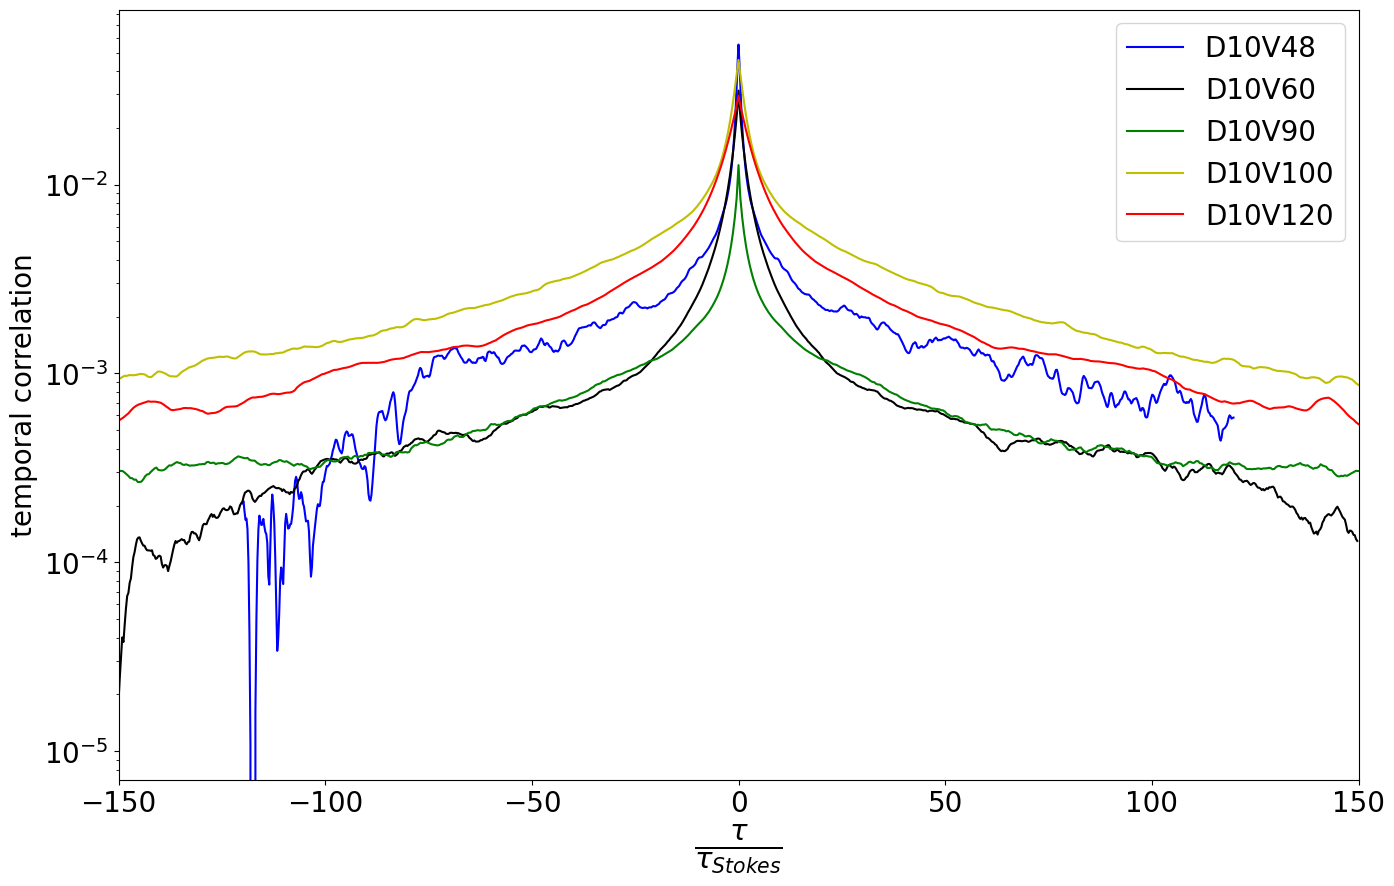

In [9]:
#We draw all this data on the same graph to compare them

plt.figure(figsize=(16,10))


plt.plot(delay_D10V48/(10/48), temporal_D10V48, 'b-', label = 'D10V48 ')
plt.plot(delay_D10V60/(10/60), temporal_D10V60, 'k-', label = 'D10V60')
plt.plot(delay_D10V90/(10/90), temporal_D10V90, 'g-', label = 'D10V90')
plt.plot(delay_D10V100/(10/100), temporal_D10V100, 'y-', label = 'D10V100')
plt.plot(delay_D10V120/(10/120), temporal_D10V120, 'r-', label = 'D10V120')


plt.xlabel(r'$\frac{\tau}{\tau_{Stokes}}$', fontsize = 30)
plt.ylabel('temporal correlation')
plt.yscale('log')
plt.xlim(-150, 150)
#plt.ylim(0, 800)
plt.legend()
plt.savefig(folder + 'temporal_correlations')

plt.show()

In [13]:
#The fit-function is given by the Thompson article (1991)

def f_diffusion(tau, g0, TauD, Taut, ginf):
    return g0/(1+abs(tau)/TauD)*np.exp(-(abs(tau)/Taut)**2/(1+abs(tau)/TauD)) + ginf

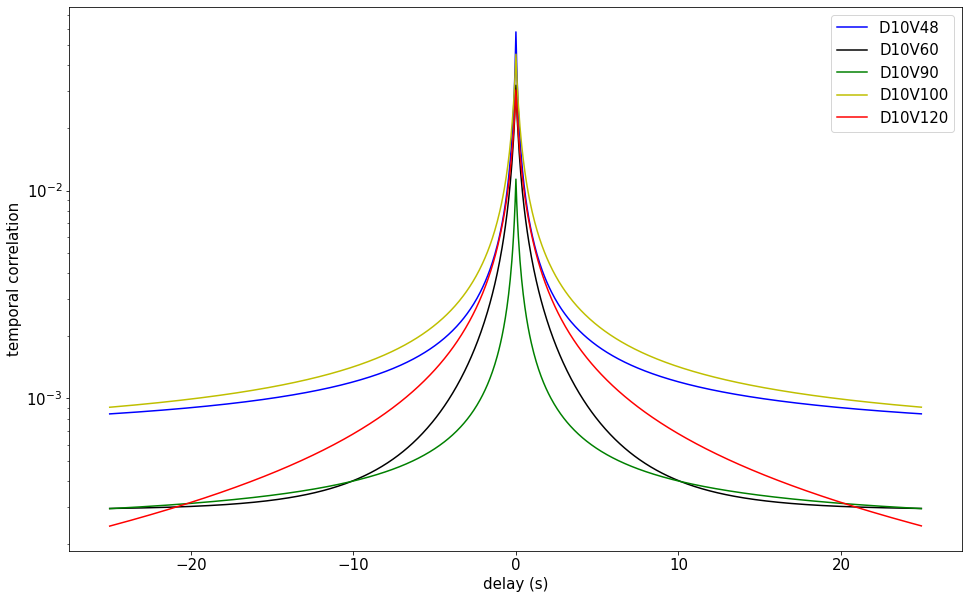

In [14]:
#We draw all this data on the same graph to compare them

plt.figure(figsize=(16,10))


plt.plot(delay_D10V48, f_diffusion(delay_D10V48, fit_D10V48[0], fit_D10V48[1], fit_D10V48[2], fit_D10V48[3]), 'b-', label = 'D10V48 ')
plt.plot(delay_D10V60, f_diffusion(delay_D10V60, fit_D10V60[0], fit_D10V60[1], fit_D10V60[2], fit_D10V60[3]), 'k-', label = 'D10V60')
plt.plot(delay_D10V90, f_diffusion(delay_D10V90, fit_D10V90[0], fit_D10V90[1], fit_D10V90[2], fit_D10V90[3]), 'g-', label = 'D10V90')
plt.plot(delay_D10V100, f_diffusion(delay_D10V100, fit_D10V100[0], fit_D10V100[1], fit_D10V100[2], fit_D10V100[3]), 'y-', label = 'D10V100')
plt.plot(delay_D10V120, f_diffusion(delay_D10V120, fit_D10V120[0], fit_D10V120[1], fit_D10V120[2], fit_D10V120[3]), 'r-', label = 'D10V120')


plt.xlabel('delay (s)')
plt.ylabel('temporal correlation')
plt.yscale('log')
#plt.xlim(0, 2000)
#plt.ylim(0, 800)
plt.legend()
plt.savefig(folder + 'temporal_correlations')

plt.show()

# Spatial Correlations

In [15]:
spatial_D10V48 = genfromtxt(data_path_D10V48 + 'spatial_correlation.txt')[0]
distance_D10V48 = genfromtxt(data_path_D10V48 + 'spatial_correlation.txt')[1]

spatial_D10V60 = genfromtxt(data_path_D10V60 + 'spatial_correlation.txt')[0]
distance_D10V60 = genfromtxt(data_path_D10V60 + 'spatial_correlation.txt')[1]

spatial_D10V90 = genfromtxt(data_path_D10V90 + 'spatial_correlation.txt')[0]
distance_D10V90 = genfromtxt(data_path_D10V90 + 'spatial_correlation.txt')[1]

spatial_D10V100 = genfromtxt(data_path_D10V100 + 'spatial_correlation.txt')[0]
distance_D10V100 = genfromtxt(data_path_D10V100 + 'spatial_correlation.txt')[1]

spatial_D10V120 = genfromtxt(data_path_D10V120 + 'spatial_correlation.txt')[0]
distance_D10V120 = genfromtxt(data_path_D10V120 + 'spatial_correlation.txt')[1]

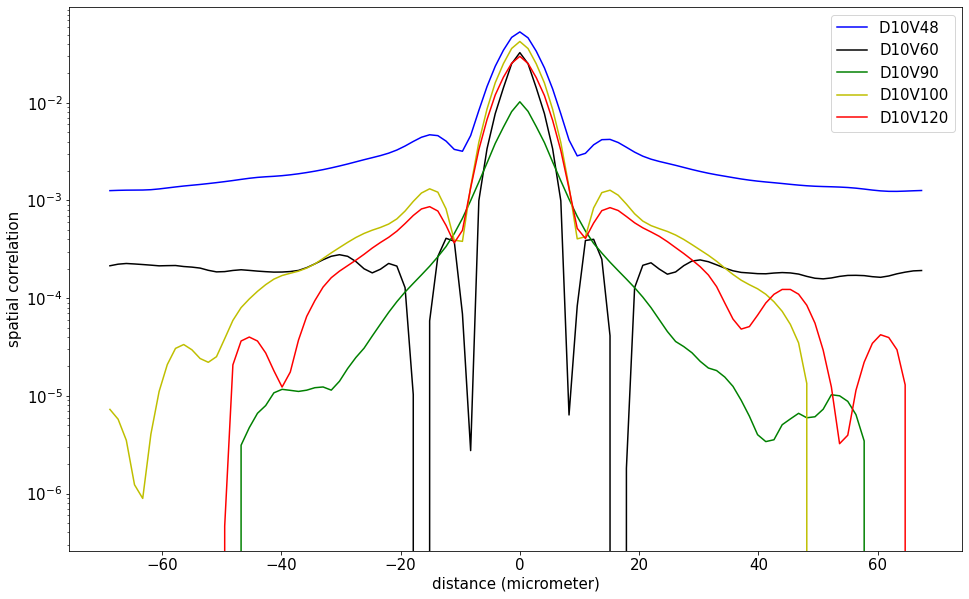

In [16]:
#We draw all this data on the same graph to compare them

plt.figure(figsize=(16,10))


plt.plot(distance_D10V48, spatial_D10V48, 'b-', label = 'D10V48 ')
plt.plot(distance_D10V60, spatial_D10V60, 'k-', label = 'D10V60')
plt.plot(distance_D10V60, spatial_D10V90, 'g-', label = 'D10V90')
plt.plot(distance_D10V100, spatial_D10V100, 'y-', label = 'D10V100')
plt.plot(distance_D10V120, spatial_D10V120, 'r-', label = 'D10V120')


plt.xlabel('distance (micrometer)')
plt.ylabel('spatial correlation')
plt.yscale('log')
#plt.xlim(0, 2000)
#plt.ylim(0, 800)
plt.legend()
plt.savefig(folder + 'spatial_correlations')

plt.show()

# I(r)

In [17]:
I_D10V48 = genfromtxt(data_path_D10V48 + 'I(r)_over_500t.txt')[0]
r_D10V48 = genfromtxt(data_path_D10V48 + 'I(r)_over_500t.txt')[1]

I_D10V60 = genfromtxt(data_path_D10V60 + 'I(r)_over_500t.txt')[0]
r_D10V60 = genfromtxt(data_path_D10V60 + 'I(r)_over_500t.txt')[1]

I_D10V90 = genfromtxt(data_path_D10V90 + 'I(r)_over_500t.txt')[0]
r_D10V90 = genfromtxt(data_path_D10V90 + 'I(r)_over_500t.txt')[1]

I_D10V100 = genfromtxt(data_path_D10V100 + 'I(r)_over_500t.txt')[0]
r_D10V100 = genfromtxt(data_path_D10V100 + 'I(r)_over_500t.txt')[1]

I_D10V120 = genfromtxt(data_path_D10V120 + 'I(r)_over_500t.txt')[0]
r_D10V120 = genfromtxt(data_path_D10V120 + 'I(r)_over_500t.txt')[1]

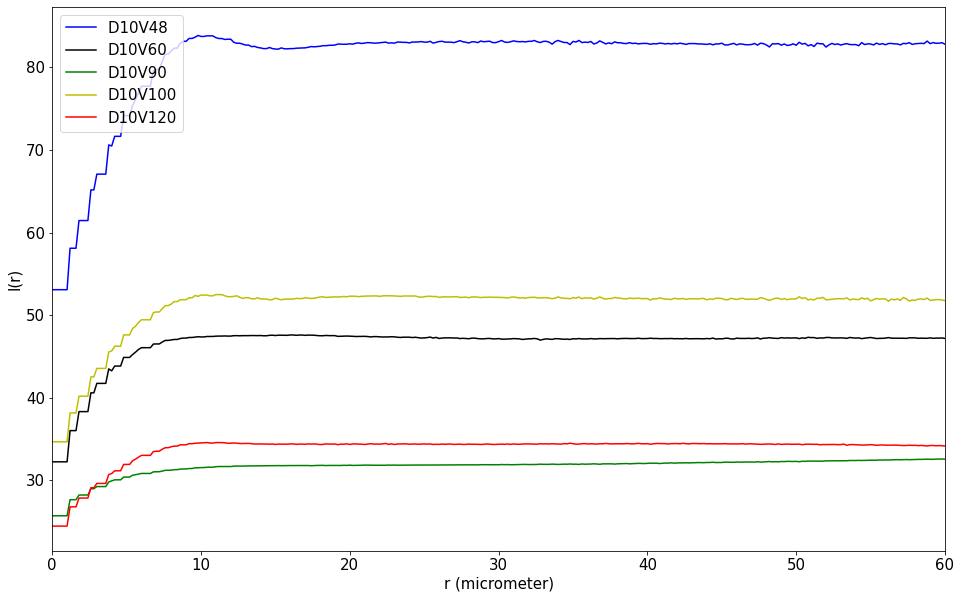

In [19]:
#We draw all this data on the same graph to compare them

plt.figure(figsize=(16,10))


plt.plot(r_D10V48, I_D10V48, 'b-', label = 'D10V48 ')
plt.plot(r_D10V60, I_D10V60, 'k-', label = 'D10V60')
plt.plot(r_D10V60, I_D10V90, 'g-', label = 'D10V90')
plt.plot(r_D10V100, I_D10V100, 'y-', label = 'D10V100')
plt.plot(r_D10V120, I_D10V120, 'r-', label = 'D10V120')


plt.xlabel('r (micrometer)')
plt.ylabel('I(r)')
plt.yscale('linear')
plt.xlim(0, 60)
#plt.ylim(0, 800)
plt.legend()
plt.savefig(folder + 'RDF')

plt.show()